<a href="https://colab.research.google.com/github/marioleandrovanegas/Entrega3U1/blob/main/MD/Grupo6_Unidad1_Modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de aprendizaje automático para la toma de Decisiones - Unidad 1 Módulo 3

### **Grupo 6:**

* **Ángela Rodríguez Narváez - Código 9025897**
* **Ángela Nieto Gómez - Código 9026707**
* **Mario Vanegas Valencia - Código 9026612**

## Etapa 1: conocimiento de los datos

En esta etapa se realizarán las siguientes actividades, posterior a la descripción del conjunto de datos

1. Identificar número de muestras y atributos
2. Identificar el tipo de cada atributo
3. Calcular medidas de centralidad y dispersión por cada atributo de acuerdo a su tipo (hacer gráfico de cajas y bigotes por atributo, diagrama de dispersión u otro diagrama acorde al tipo del atributo que ilustre el comportamiento de los datos)
4. Calcular la matriz de correlación entre los atributos de entrada
5. Determinar el grado de balanceo entre los valores del atributo objetivo
6. Identificar número de datos faltantes por clase
7. Identificar número de datos atípicos por clase.

## Descripción del conjunto de datos - Skin segmentation
## AJUSTAR

Se cuenta con información de pacientes que sufrieron infartos en algún momento del pasado. Algunos siguen vivos y otros no. Las variables "survival" y "still-alive" en conjunto, indican si un paciente sobrevivió al menos un año después del infarto.

Variables



## Etapa 1: Entendimiento de los datos
A continuación se desarrollan los pasos para conocer de manera descriptiva el dataset.

Para cargar la base de datos, creamos un repositorio en Github al cual podemos acceder publicamente, posteriormente realizamos la carga del archivo.

In [34]:
! git clone https://github.com/marioleandrovanegas/Entrega3U1.git

fatal: destination path 'Entrega3U1' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("/content/Entrega3U1/Skin_NonSkin.txt", sep='\s+', header = None)
#Asignamos los nomobres de las columnas según recomendación de los autores de la base de datos.
df.columns = ["B","G","R","Clase"]
df.head()

,B,G,R,Clase
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


### **1. Número de muestras y atributos**

La base de datos original cuenta con 245057 registros, cada uno con 3 atributos realcionados con el color de la piel (R,G,B) y un resultado (clase).

In [36]:
#Cuál es el número de registros y de atributos?

shape = df.shape
shape

(245057, 4)

### **2. Tipo de cada atributo**

Al leer la descripción de los datos, nos dicen que la clase es binaria, sin embargo, al validar los tipos de datos encontramos que Clase es tipo entero, por lo tanto se procede a convertirla a binaria.

In [37]:
#Cual es el tipo de los atributos?
df.dtypes

,0
B,int64
G,int64
R,int64
Clase,int64


Al revisar el contexto de los datos, los resultadode de clase, indica la naturaleza del problema, donde 1 indica "piel" y 2 indica "no piel", por esta razón realizaremos una conversión a binarios, donde los no piel pasaran a valer cero, y de esta forma será interpretado como falso en código binario.

In [38]:
df["Clase"] = df.apply(lambda x: 1 if x["Clase"] == 1 else False, axis=1)
df.head()

,B,G,R,Clase
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [39]:
df['Clase'] = df['Clase'].astype('bool')
df.dtypes

,0
B,int64
G,int64
R,int64
Clase,bool


## **3. Medidas de centralidad y dispersión**

In [40]:
#Medida de centralidad y desviación para atributos numéricos:
df.describe()

,B,G,R
count,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151
std,62.255653,59.941197,72.562165
min,0.000000,0.000000,0.000000
25%,68.000000,87.000000,70.000000
50%,139.000000,153.000000,128.000000
75%,176.000000,177.000000,164.000000
max,255.000000,255.000000,255.000000


In [41]:
#Moda de los datos
df.mode()

,B,G,R,Clase
0,178,178,0,False


<Axes: >

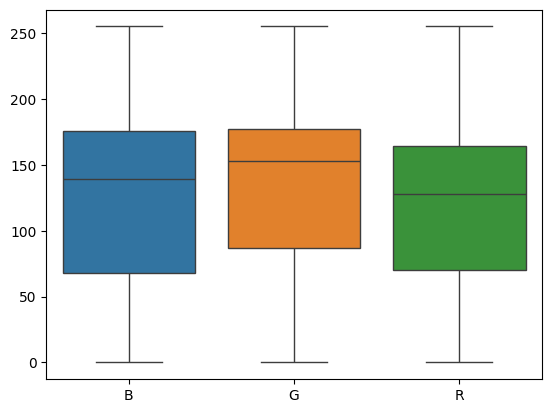

In [42]:
#Ahora hacemos la selección de las variables numéricas para realizar el análisis de cajas y poder visualizar si existen outliers
df_n = df.select_dtypes(include="int64")
df_n
#Generar grafica de cajas
sns.boxplot(df_n)

Al realizar el análisis del grafico, se observa que no se tienen datoa atípicos, por esta razón se procede a continuar con la matiz de confusión.

## **4. Matriz de Confusión


entrada**

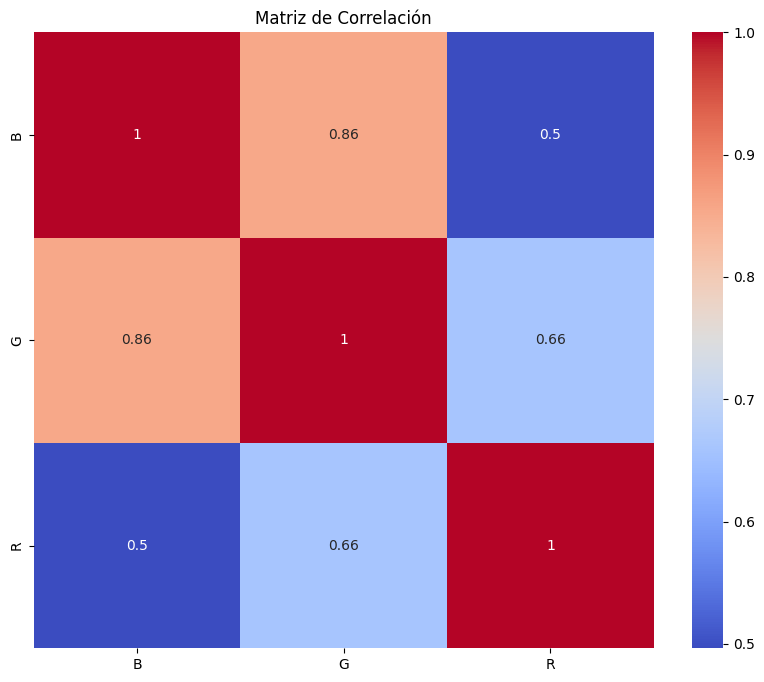

In [43]:
dn_c = df.iloc[:, [0, 1, 2]] # se excluye la variable predictora
correlacion = dn_c.corr()

# Graficar
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## **5. Grado de balanceo entre los valores del atributo objetivo**

In [45]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(df['Clase'].value_counts())


Clase
False    194198
True      50859
Name: count, dtype: int64


## **6. Datos faltantes por clase**

In [46]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(df.isnull().sum(axis=1))

0

In [47]:
#Cuantos datos faltantes hay por cada atributo?
df.isnull().sum()

,0
B,0
G,0
R,0
Clase,0


## **7. Identificar número de datos atípicos por clase.**

In [48]:
!pip install pyod
import pyod as pyod
from pyod.models.knn import KNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 506.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 1.6 MB/s eta 0:00:00


Considerando que para determinar los datos atípicos se necesita que las variables no tengan datos faltantes, se crea un dataset nuevo para poder aplicar esta prueba que elimina la variable "alive-at-1" por la cantidad de datos faltantes que tiene, para evitar eliminar 57 registros al eliminar los datos faltantes de los demás atributos durante el análisis de datos atípicos

Se realiza un primer análisis de atípicos incluyendo la variable "alive-at-1", pese a que con ella se pierden 57 registros al eliminar datos faltantes.

Resumen de outliers detectados:
outlier_flag
0    226287
1     18770
Name: count, dtype: int64


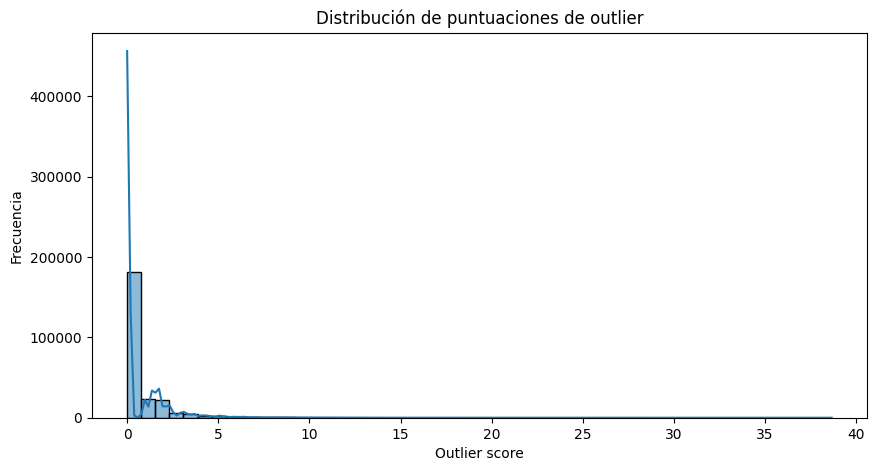

Ejemplos de outliers:


,B,G,R,outlier_flag,outlier_score
70,61,82,127,1,2.828427
79,170,190,247,1,3.000000
80,175,195,250,1,3.316625
81,180,201,253,1,3.162278
90,215,217,251,1,3.741657


In [49]:
# Eliminar filas con valores faltantes
data_knn = df_n.dropna().copy()

# Aplicar el modelo KNN de pyod para detectar outliers
X = data_knn.drop(['outlier_flag', 'outlier_score'], axis=1, errors='ignore')  # solo datos numéricos

clf = KNN()
clf.fit(X)

# Obtener resultados
data_knn['outlier_flag'] = clf.predict(X)  # 1 = outlier, 0 = normal
data_knn['outlier_score'] = clf.decision_function(X)

# Ver resumen
print("Resumen de outliers detectados:")
print(data_knn['outlier_flag'].value_counts())

# Visualización de puntuaciones
plt.figure(figsize=(10, 5))
sns.histplot(data_knn['outlier_score'], bins=50, kde=True)
plt.title("Distribución de puntuaciones de outlier")
plt.xlabel("Outlier score")
plt.ylabel("Frecuencia")
plt.show()

# Mostrar los outliers detectados
outliers = data_knn[data_knn['outlier_flag'] == 1]
print("Ejemplos de outliers:")
display(outliers.head())

Se realiza una segunda identificación de atípicos sin tener en cuenta la variable "alive-at-1" utilizando el dataframe creado sin esta variable "data_limpio"

### **Interpretación gráfico**

Se observa que al excluir el atributo "alive-at-1" en el análisis de atípicos se pierden menos observaciones y el modelo KNN indica que existe 5 datos atípicos, a diferencia de los 3 resultantes del ejercicio con todas las variables numéricas. Estos 5 datos atípicos están en los registros **6, 26, 42, 53 y 107**

## **Preparación de los datos**

De acuerdo con en análisis exploratorio de datos realizado, se encontró lo siguiente:

*  En el dataset, los datos que se encuentran en el atributo "alive-at-1" no tienen coherencia con la interpretación que se encuentra en el sitio web. Se llega a esta conclusión porque se indica que esta variable toma valor de 1 si el paciente sobrevivió más de un año después del ataque cardiaco, sin embargo al analizar algunos de los resultados, hay registros donde el atributo de survival (meses de supervivencia) es mayor a 12 meses, pero el valor en la variable "alive-at-1" es 0.
* Adicionalmente, conforme describen los autores del dataset, es posible que algunos pacientes hayan sobrevivido menos de un año, pero sigan vivos, por lo cual sugieren verificar los datos de "survival" y "still-alive" para confirmarlo.Si "survival" es menor a un año y "still-alive" es igual a 1, los autores del dataset indican que no se deben tener en cuenta estos registros en los análisis y sugieren excluirlos.

Teniendo en cuenta lo anterior, se realizarán las siguientes acciones de preparación de los datos

### **Acciones por realizar**

1. Eliminar el registro que tiene dato faltante en el atributo "survival" porque no es posible imputar un valor de supervivencia basado en el resto de las observaciones.

2. Eliminar los registros que los autores del dataset sugieren excluir de los análisis, conforme con la descripción previa.

3. Eliminar la variable alive-at-1, debido a que además de que no guarda coherencia en sus observaciones conforme con la lógica descrita para la variable, es un atributo que tiene una gran cantidad de valores nulos, que no es posible imputar basado en los demás registros.

4. Eliminar las variables "group", "name", "mult", "wall-motion-score", cumpliendo con la sugerencia dada por los creadores de la base de datos.

Posterior a eliminar estos datos, realizamos una nueva revisión de datos faltantes para terminar la imputación.

### **Análisis de datos faltantes posterior a la modificación de la base por sugerencia de los autores**

Se realiza nuevamente un análisis de datos faltantes después de ejecutar las recomendaciones de los autores para la manipulación del dataset. Este análisis será de utilidad en la Etapa 2. - En el modelo de entrenamiento 2 que requiere la eliminación de datos faltantes.

# Etapa 2. Entrenamiento de un modelo de regresión logística

En esta etapa el conjunto de datos se modificará de acuerdo con los siguientes casos:

1. Conjunto original (Transformando datos categóricos, si aplica)
2. Conjunto sin datos faltantes
3. Conjunto sin datos faltantes ni atípicos
4. Conjunto sin datos faltantes, ni atípicos, ni correlacionados
5. Conjunto balanceado y sin datos faltantes, ni atípicos, ni correlacionados
6. Conjunto obtenido en el paso 5 y aplicando PCA

## 1. Conjunto original
Se realiza la depuración propuesta por los autores

In [50]:
# 1. Eliminar el registro que tiene dato faltante en el atributo "survival"
data_orig = df[df['Clase'].notna()] #se conservan únicamente los datos no nulos de la variable "survival"

# 2. Eliminar los registros que los autores del dataset sugieren excluir de los análisis, conforme con la descripción previa.
#data_orig = data_orig[~((data_orig['still-alive'] == 1) & (data_orig['survival'] < 12))]

# 3. Eliminar las variables "alive-at-1", "group", "mult", "wall-motion-score", "name"

#data_orig = data_orig.drop(['group','mult','wall-motion-score','alive-at-1', 'name'],axis=1)

# El modelo de regresión logística no admite NaN entonces es necesario eliminar las observaciones con datos faltantes
data_orig.dropna(inplace=True)
data_orig.shape

(245057, 4)

In [51]:
from sklearn import preprocessing
# Se normalizan los atributos seleccionados
data_orig['Clase'] = preprocessing.scale(data_orig['Clase'])
data_orig['R'] = preprocessing.scale(data_orig['R'])
data_orig['G'] = preprocessing.scale(data_orig['G'])
data_orig['B'] = preprocessing.scale(data_orig['B'])

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

# se aplica random_state para que el resultado de accuracy siempre sea el mismo
X_train, X_test, y_train, y_test = train_test_split(data_orig.drop('Clase', axis=1), data_orig['Clase'], test_size=0.30, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(65, 7) (65,)
(17, 7) (17,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predict_orig = logisticRegr.predict(X_test)
predict_orig

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

acc_orig = accuracy_score(y_test, predict_orig)
acc_orig

0.9411764705882353

## 2. Conjunto sin datos faltantes

### **2.1 Imputación de datos faltantes**

Observando que las variables contienen datos faltantes, teniendo en cuenta los gráficos de cajas realizados en el proceso de preparación de los datos, definimos que el mejor método para imputar los datos es la mediana

In [ ]:
# Imputación de datos faltantes
# Utilizamos el dataset "de" que ya contaba con la depuración sugerida por los autores
de['age-at-heart-attack'].fillna(de['age-at-heart-attack'].median(), inplace=True)
de['epss'].fillna(de['epss'].median(), inplace=True)
de['lvdd'].fillna(de['lvdd'].median(), inplace=True)
de['fractional-shortening'].fillna(de['fractional-shortening'].median(), inplace=True)

/tmp/ipython-input-1150785956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  de['age-at-heart-attack'].fillna(de['age-at-heart-attack'].median(), inplace=True)
/tmp/ipython-input-1150785956.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
from sklearn import preprocessing
# Se normalizan los atributos seleccionados
de['survival'] = preprocessing.scale(de['survival'])
de['age-at-heart-attack'] = preprocessing.scale(de['age-at-heart-attack'])
de['lvdd'] = preprocessing.scale(de['lvdd'])
de['epss'] = preprocessing.scale(de['epss'])
de['wall-motion-index'] = preprocessing.scale(de['wall-motion-index'])
de['fractional-shortening'] = preprocessing.scale(de['fractional-shortening'])

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test
from sklearn.model_selection import train_test_split

# se aplica random_state para que el resultado de accuracy siempre sea el mismo
X_train, X_test, y_train, y_test = train_test_split(de.drop('still-alive', axis=1), de['still-alive'], test_size=0.20, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(76, 7) (76,)
(20, 7) (20,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predict_f = logisticRegr.predict(X_test)
predict_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

acc_f = accuracy_score(y_test, predict_f)
acc_f

0.9

## 3. Base de datos sin faltantes ni atípicos

Realizamos inicialmente un análisis de datos atípicos individuales, sin embargo estas variables médicamente pueden tener patrones, por esta razón decidimos encontrar outliers aplicando KNN, de esta forma se tiene en cuenta el conjunto de variables de forma simultánea. Como resultado se eliminan las observaciones 6,26,42,53 y 107. Los registros 53 y 107 ya se habían eliminado en pasos previos de limpieza de datos.

Se debe tener en cuenta que el dataset que contiene estos datos es "deat".


In [ ]:
# Se eliminan observaciones atípicas del análisis con KNN
deat = de.copy()
deat = deat.drop(6,axis=0)
deat = deat.drop(26,axis=0)
deat = deat.drop(42,axis=0)

deat

,survival,still-alive,age-at-heart-attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index
0,-1.561026,0,1.210796,0,0.277349,-0.288833,-0.100439,-0.781828
1,-0.881203,0,1.338528,0,1.394112,-0.742535,-0.721553,1.250229
2,-1.136136,0,-0.832921,0,0.277349,-1.045003,-1.566267,-0.781828
3,2.347956,0,-0.194260,0,0.212204,0.174245,-0.096713,0.524495
4,-0.881203,1,-0.577457,0,-0.653287,1.677209,1.328122,2.846846
...,...,...,...,...,...,...,...,...
125,-0.711247,0,-0.066527,0,-0.839414,2.206528,0.595208,0.001966
127,0.988310,0,0.316670,0,0.463476,-0.833276,0.980298,-0.491534
128,0.563421,0,0.955331,0,-0.281033,-0.591301,0.458563,-0.172211
129,-0.626269,0,-0.577457,0,-0.839414,0.784928,-0.398574,0.263230


In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

# se aplica random_state para que el resultado de accuracy siempre sea el mismo
X_train, X_test, y_train, y_test = train_test_split(deat.drop('still-alive', axis=1), deat['still-alive'], test_size=0.20, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(74, 7) (74,)
(19, 7) (19,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predict_atip = logisticRegr.predict(X_test)
predict_atip

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

acc_atip = accuracy_score(y_test, predict_atip)
acc_atip

0.8947368421052632

## 4. Conjunto sin datos faltantes, ni atípicos, ni correlacionados

A continuación se realiza una matriz de correlaciones teniendo en cuenta el dataframe "deat" que ya no tiene datos faltantes ni atípicos. A partir de los resultados de la matriz de correlación, eliminaremos las variables que tienen mayor corelación.



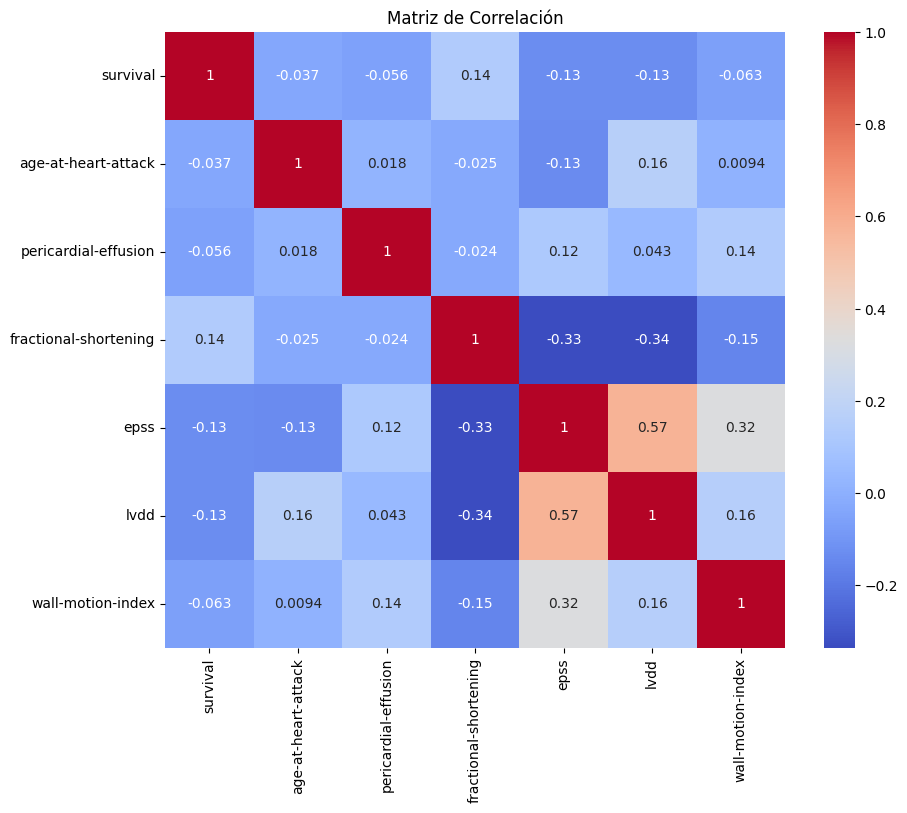

In [ ]:
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
correlacion2 = deat.iloc[:, [0, 2, 3, 4, 5, 6, 7]] # se excluye la variable predictora
corr = correlacion2.corr()

# Graficar
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

De acuerdo con los resultados, decidimos eliminar "epss" teniendo en cuenta que en esta variable inicialmente habían mayor número de datos faltantes que fueron imputados con la mediana. Por tanto, la variable "lvdd" tiene mayor número de registros de la base original

In [ ]:
#Eliminación de datos correlacionados
deatco = deat.drop('epss', axis = 1) # se toma como base "deat" que es el dataframe sin atípicos ni faltantes

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

# se aplica random_state para que el resultado de accuracy siempre sea el mismo
X_train, X_test, y_train, y_test = train_test_split(deatco.drop('still-alive', axis=1), deatco['still-alive'], test_size=0.20, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(74, 6) (74,)
(19, 6) (19,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predict_cor = logisticRegr.predict(X_test)
predict_cor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

acc_cor = accuracy_score(y_test, predict_cor)
acc_cor

0.8947368421052632

## 5. Conjunto balanceado y sin datos faltantes, ni atípicos, ni correlacionados

In [ ]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = deatco.groupby('still-alive')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

/tmp/ipython-input-3737192936.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


In [ ]:
# Se verifica que haya quedado el mismo número de registros por cada clase
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

# se aplica random_state para que el resultado de accuracy siempre sea el mismo
X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('still-alive', axis=1), dataBal['still-alive'], test_size=0.20, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(12, 6) (12,)
(4, 6) (4,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predict_bal = logisticRegr.predict(X_test)
predict_bal

array([1, 1, 0, 1])

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

acc_bal = accuracy_score(y_test, predict_bal)
acc_bal

0.5

## 6. Conjunto obtenido en el paso 5 y aplicando PCA: PCA - deatco

### **6.1. Análisis de componentes principales - dataBal**

Para el análisis de componentes principales, lo primero que hacemos el ajustar el pca al conjunto de datos, de esta forma establecemos cuántas variables requerimos para aplicar la transformación de los datos.

In [ ]:
from sklearn.decomposition import PCA
feat = dataBal.iloc[:,[0] + list(range(2,6))]
#feat = deatco.drop('still-alive', axis = 1)
# Crear objeto PCA (2 componentes principales)
pca = PCA()
pca.fit(dataBal[feat.columns])

PCA()

In [ ]:
pcaDF= pd.DataFrame({"expl_var":  pca.explained_variance_ratio_,
                     "pc": range(1,pca.n_components_ + 1),
                     "cum_var": pca.explained_variance_ratio_.cumsum()})

pcaDF

,expl_var,pc,cum_var
0,0.518650,1,0.518650
1,0.223058,2,0.741708
2,0.154398,3,0.896106
3,0.084692,4,0.980798
4,0.019202,5,1.000000


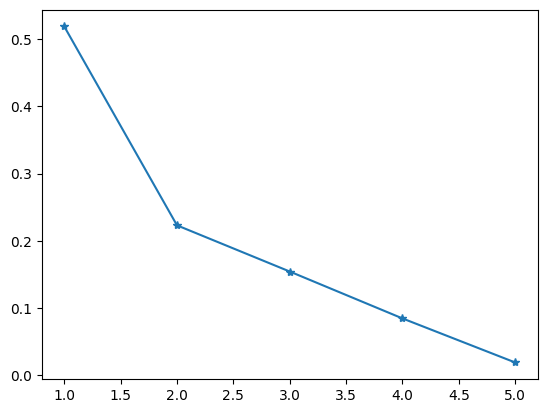

In [ ]:
plt.plot(range(1, pca.n_components_ + 1),pca.explained_variance_ratio_,'*-')

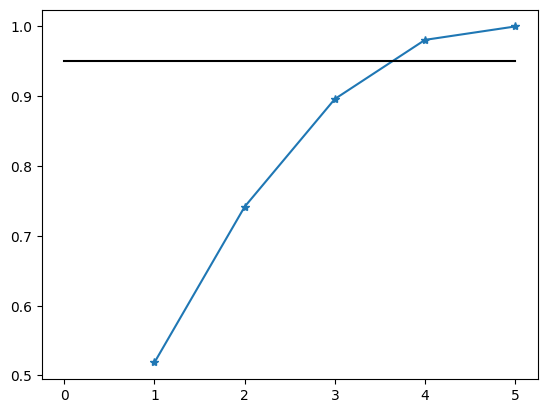

In [ ]:
plt.plot(range(1, pca.n_components_ + 1),pca.explained_variance_ratio_.cumsum(),'*-')
plt.plot([0,5],[0.95,0.95],'k')

In [ ]:
from sklearn.metrics import confusion_matrix

Se decide realizar el análisis con 4 componentes principales considerando que en estos se acumula el 97% de los datos y también porque a partir del método del codo, este es el punto de inflexión de la gráfica anterior.

In [ ]:
# 1. Separar X_bal y y_bal
X_bal = dataBal.drop('still-alive', axis=1)
y_bal = dataBal['still-alive']

# 2. PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_bal)

# 3. División
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_bal, test_size=0.2, random_state=42)

# Entrenamiento del modelo de clasificación por regresión logística
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

# Aplicación del modelo construido a los datos de test
predict_pca = logisticRegr.predict(X_test)
predict_pca

# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
acc_pca = accuracy_score(y_test, predict_pca)
acc_pca


0.5

El modelo con PCA arroja el mismo resultado de accuracy que el entrenamiento realizado en el paso 5.

## **Resultados consolidados de la Etapa 2**

In [ ]:

resultados = pd.DataFrame({
    'Conjunto_De_Datos': [
        'Conjunto original',
        'Sin faltantes',
        'Sin faltantes. ni atípicos',
        'Sin faltantes, ni atípicos, ni correlacionados',
        'Balanceado, sin faltantes, ni atípicos, ni correlacionados',
        'Balanceado + PCA'
    ],
    'Accuracy': [
        acc_orig,
        acc_f,
        acc_cor,
        acc_atip,
        acc_bal,
        acc_pca
    ]
})
resultados

,Conjunto_De_Datos,Accuracy
0,Conjunto original,0.941176
1,Sin faltantes,0.900000
2,Sin faltantes. ni atípicos,0.894737
3,"Sin faltantes, ni atípicos, ni correlacionados",0.894737
4,"Balanceado, sin faltantes, ni atípicos, ni cor...",0.500000
5,Balanceado + PCA,0.500000


Después de realizar los diferentes ejercicios de entrenamiento se encuentra que el modelo con el indicador de "accuracy" más alto es el conjunto original. Sin embargo, dado que la mayor cantidad de registros indican que los pacientes no sobreviven después de un año, la predicción está sesgada porque el entrenamiento está desbalanceado, por tanto no se puede considerar que la predicción sea fiable, sobre todo para los casos de los que vivieron más de un año.

Al eliminar faltantes, atípicos y variables correlacionadas no se pierde de forma considerable el nivel de accuracy, sin embargo, estos conjuntos de datos siguen sin estar balanceados, por lo cual tampoco se puede considerar que sus predicciones sean fiables.

Por otra parte, el conjunto de datos balanceado, sin faltantes, atípicos ni correlacionados tiene un nivel mucho más bajo de accuracy (50%), pero es más confiable respecto a la predicción, porque balancea las observaciones del dataset.

Adicionalmente, se encuentra que el nivel de accuracy entre el conjunto balanceado y balanceado + PCA es igual. No obstante, considerando que en PCA se elimina un componente principal y se realiza el entrenamiento con 4 de 5 componentes, no se pierde precisión en la predicción, pero operativamente sería más eficiente dado que utiliza menos recursos.

Teniendo en cuenta lo anterior, se concluye que este ejercicio evidencia que la medida de accuracy no es fiable si no se conoce cómo fueron procesados los datos para el entrenamiento del modelo, por lo que la etapa de preprocesamiento es indispensable para evitar incluir en el modelo información innecesaria; así mismo el balanceo de los datos es un paso importante en el entrenamiento de los modelos para evitar predicciones sesgadas.


# Fin del programa